### import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline 
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('OnlineRetail.csv')
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [46]:
##CLEAN DATA

In [48]:
df = df.dropna(subset=["CustomerID", "Description"]) #drop where customerid and description missing

df=df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)] #drop rows with missing customer id or unit price

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])#convert invoice date to date time

In [49]:
##FEATURE ENGINEERING

In [52]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] #create new column totalprice=Quantity x UnitPrice
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [54]:
##Double check for any null values

In [56]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [58]:
##DESCRIBE DATA TO GET MORE INSIGHTS

In [60]:
display(df.describe())

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [62]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [64]:
##FIND IF ANY CORRELATION BETWEEN NUMERIC ATTRIBUTES

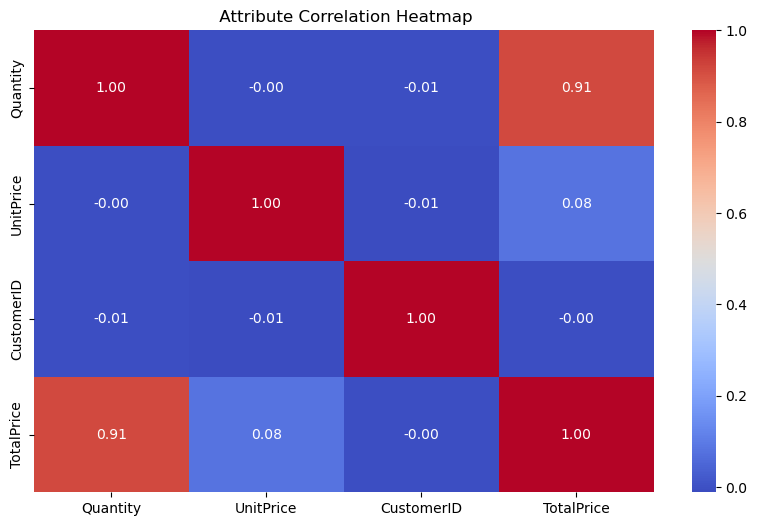

In [68]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Attribute Correlation Heatmap")
plt.show()

In [70]:
##FIND THE CORRELATION HEATMAP FOR THE CATEGORICAL DATA

In [72]:
categorical_cols = df.select_dtypes(include='object').columns #encode categorical columns

df_encoded = df[categorical_cols].copy() #make a copy and encode each categorical column

label_encoders = {} #use label encode on all categorical columns
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le


In [ ]:
##CREATE A CORRELATION MATRIX AND VISUALIZE IT

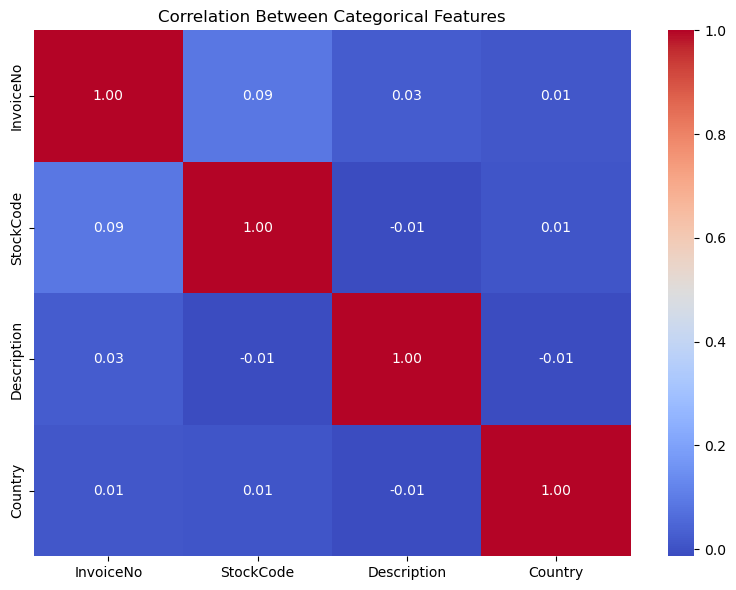

In [104]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Categorical Features")
plt.tight_layout()
plt.show()

In [ ]:
##NOW WE WANT TO FIND THE TOP 10 BEST SELLING PRODUCTS

In [76]:
top_products = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10) 

In [ ]:
##VISUALIZE TOP 10 PRODUCTS

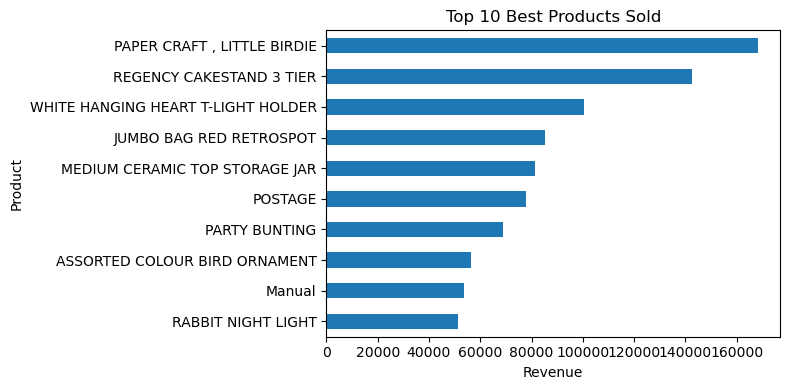

In [106]:
top_products.plot(kind="barh", figsize=(8, 4), title="Top 10 Best Products Sold")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # Show highest at top
plt.tight_layout()
plt.show()

In [82]:
##NOW LETS FIND THE MONTHLY REVENUE TREND

In [84]:
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M").astype(str) #create month column

monthly_revenue = df.groupby("InvoiceMonth")["TotalPrice"].sum() #group them by month


In [86]:
##VISUALIZE MONTHLY REVENUE USING LINE GRAPH

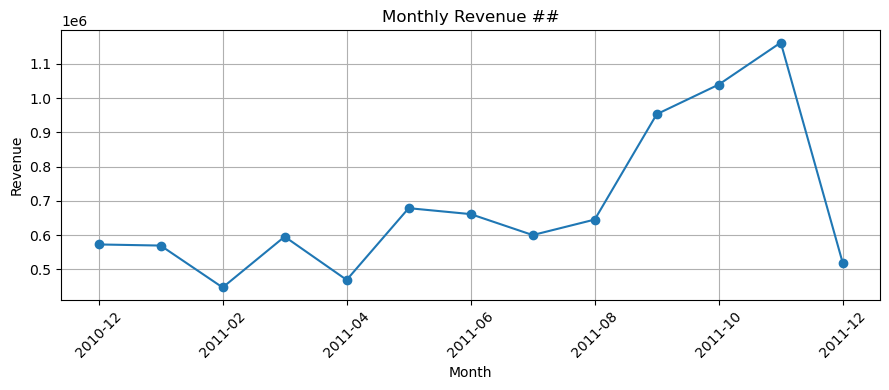

In [108]:
monthly_revenue.plot(kind="line", marker="o", figsize=(9, 4), title="Monthly Revenue ##")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
##FIND MOST BUYING CUSTOMER USING TOTAL PRICE

In [92]:
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10) #group data by customer id and find total price.


In [ ]:
##PRINT RESULTS

In [94]:
print("Top 10 Customers by Total Money Spent:")
print(top_customers)

Top 10 Customers by Total Money Spent:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


In [ ]:
##NOW LETS FIND WHICH COUNTRIES SPENT THE MOST

In [98]:
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10) #group data by country and find total price

In [100]:
##PRINT RESULTS

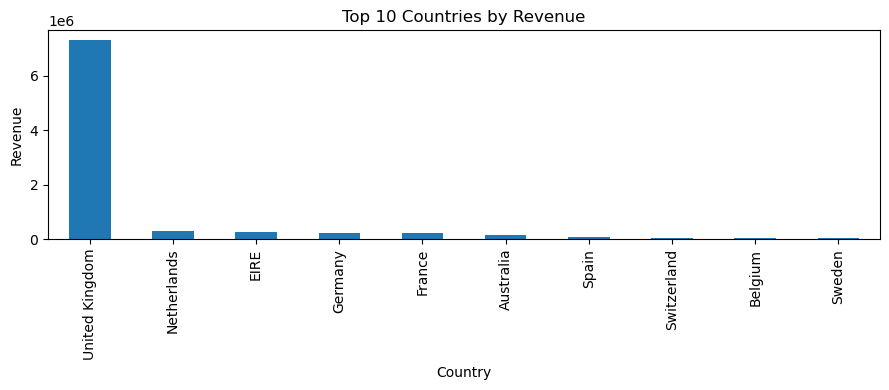

In [110]:
top_countries.plot(kind="bar", figsize=(9, 4), title="Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.tight_layout()
plt.show()